# ***`IMAGE CLASSIFICATION`***

Image Classification is a computer vision task where a program analyzes an image and predicts the category (or class) it belongs to.

For example:

Given an image of an animal, the model might predict whether it's a horse or a human.

In [ ]:
# Image Collection: --------Gather labeled images for each class.
# Preprocessing:-------- Resize and normalize images so they're consistent.
# Feature Extraction:------ Convert the image  into a flat vector or set of features.
# Model Training:---------- Use machine learning algorithms (like SVM etc) to learn from the features and labels.
# Prediction:-------- Use the trained model to classify new, unseen images.
# Evaluation:------ Test the model’s accuracy and performance.

access your Google Drive files directly inside your Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.transform import  resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report


In [ ]:
os.listdir('/content/drive/MyDrive/DATASET')          #list image files

['horse', 'human']

In [ ]:
len(os.listdir('/content/drive/MyDrive/DATASET'))

2

In [ ]:
horse_path = '/content/drive/MyDrive/DATASET/horse'
human_path = '/content/drive/MyDrive/DATASET/human'


In [ ]:
# To print/display images

horse_path = os.path.join('/content/drive/MyDrive/DATASET','horse')
for i in os.listdir(horse_path):

   print(i)                           # to check if the images are accessible

horse01-0.png
horse01-1.png
horse01-2.png
horse01-3.png
horse01-4.png
horse01-5.png
horse01-6.png
horse01-7.png
horse01-8.png
horse01-9.png
horse02-0.png
horse02-1.png
horse02-2.png
horse02-3.png
horse02-4.png
horse02-5.png
horse02-6.png
horse02-7.png
horse02-8.png
horse02-9.png
horse03-0.png
horse03-1.png
horse03-2.png
horse03-3.png
horse03-4.png
horse03-5.png
horse03-6.png
horse03-7.png
horse03-8.png
horse03-9.png
horse04-0.png
horse04-1.png
horse04-2.png
horse04-3.png
horse04-4.png
horse04-5.png
horse04-6.png
horse04-7.png
horse04-8.png
horse04-9.png
horse05-0.png
horse05-1.png
horse05-2.png
horse05-3.png
horse05-4.png
horse05-5.png
horse05-6.png
horse05-7.png
horse05-8.png
horse05-9.png
horse06-0.png
horse06-1.png
horse06-2.png
horse06-3.png
horse06-4.png
horse06-5.png
horse06-6.png
horse06-7.png
horse06-8.png
horse06-9.png
horse07-0.png
horse07-1.png
horse07-2.png
horse07-3.png
horse07-4.png
horse07-5.png
horse07-6.png
horse07-7.png
horse07-8.png
horse07-9.png
horse08-0.png
horse0

In [ ]:
Categories = ['horse', 'human']
data = '/content/drive/MyDrive/DATASET'

flat_data_arr = []              # All flattened image data
target_arr = []              # labels (0 for horse, 1 for human)

In [ ]:
# Load and Process All Images

for i in Categories:
  print('Loading......',i)
  path = os.path.join(data,i)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())           #store
    target_arr.append(Categories.index(i))

  print("Loaded Category : ",i, "successfully")

Loading...... horse
Loaded Category :  horse successfully
Loading...... human
Loaded Category :  human successfully


In [ ]:
flat_data_arr

[array([0.47365022, 0.74956839, 0.97955969, ..., 0.94781698, 0.77081662,
        0.95152626]),
 array([0.47595143, 0.75555   , 0.98122676, ..., 0.84516879, 0.65928877,
        0.93164788]),
 array([0.48825918, 0.77843167, 0.98562096, ..., 0.79075701, 0.6233791 ,
        0.92628123]),
 array([0.53784086, 0.81573336, 0.99084967, ..., 0.82010649, 0.65708794,
        0.93248009]),
 array([0.58030909, 0.86221369, 0.99802361, ..., 0.54260339, 0.43068352,
        0.89885018]),
 array([0.76018414, 0.91511179, 0.9989028 , ..., 0.86043981, 0.70622979,
        0.94286133]),
 array([0.58612489, 0.87657596, 1.        , ..., 0.86709141, 0.7205627 ,
        0.94586118]),
 array([0.50267225, 0.79237279, 0.98794355, ..., 0.91143421, 0.76833862,
        0.95357897]),
 array([0.48268996, 0.73045183, 0.97482824, ..., 0.85284628, 0.69054817,
        0.9389097 ]),
 array([0.8967088 , 0.96919283, 1.        , ..., 0.93197117, 0.76946714,
        0.95305277]),
 array([0.47365022, 0.74956839, 0.97955969, ..., 0

In [ ]:
target_arr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
df = pd.DataFrame(flat_data_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.473650,0.749568,0.979560,0.472193,0.748781,0.979461,0.472905,0.748693,0.979449,0.473594,...,0.963410,0.981113,0.847077,0.966311,0.967458,0.800485,0.957215,0.947817,0.770817,0.951526
1,0.475951,0.755550,0.981227,0.476345,0.754622,0.981244,0.477337,0.754622,0.981407,0.475892,...,0.942868,0.895102,0.722422,0.944035,0.861251,0.681957,0.936307,0.845169,0.659289,0.931648
2,0.488259,0.778432,0.985621,0.489484,0.777119,0.985329,0.488696,0.776389,0.985232,0.488582,...,0.921481,0.735331,0.586242,0.921726,0.759273,0.599970,0.923305,0.790757,0.623379,0.926281
3,0.537841,0.815733,0.990850,0.538242,0.814858,0.990573,0.537251,0.814274,0.990525,0.533779,...,0.934693,0.822678,0.664463,0.934494,0.824714,0.663948,0.934152,0.820106,0.657088,0.932480
4,0.580309,0.862214,0.998024,0.579781,0.860551,0.997763,0.577471,0.859909,0.997730,0.575665,...,0.877273,0.416490,0.318807,0.881262,0.479060,0.371513,0.889442,0.542603,0.430684,0.898850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.527776,0.734469,0.971190,0.526725,0.722754,0.968144,0.520876,0.689404,0.960621,0.492215,...,0.962312,0.965201,0.796935,0.956646,0.977072,0.817615,0.959771,0.960897,0.801821,0.957544
389,0.591136,0.864910,0.996440,0.590630,0.863545,0.996423,0.591360,0.862622,0.996018,0.590066,...,0.935585,0.805153,0.660412,0.934745,0.891538,0.727528,0.945549,0.897762,0.734781,0.946909
390,0.593625,0.873323,0.999293,0.595305,0.869956,0.998482,0.600972,0.860201,0.995523,0.601212,...,0.962620,0.973590,0.811526,0.959267,0.930074,0.763654,0.951587,0.920194,0.747730,0.948606
391,0.593648,0.874563,0.998693,0.593997,0.874078,0.998677,0.592305,0.873734,0.998448,0.593227,...,0.951420,0.869119,0.702188,0.940843,0.880203,0.719411,0.944277,0.888117,0.731227,0.946509


In [ ]:
df['Target'] = target_arr

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.473650,0.749568,0.979560,0.472193,0.748781,0.979461,0.472905,0.748693,0.979449,0.473594,...,0.981113,0.847077,0.966311,0.967458,0.800485,0.957215,0.947817,0.770817,0.951526,0
1,0.475951,0.755550,0.981227,0.476345,0.754622,0.981244,0.477337,0.754622,0.981407,0.475892,...,0.895102,0.722422,0.944035,0.861251,0.681957,0.936307,0.845169,0.659289,0.931648,0
2,0.488259,0.778432,0.985621,0.489484,0.777119,0.985329,0.488696,0.776389,0.985232,0.488582,...,0.735331,0.586242,0.921726,0.759273,0.599970,0.923305,0.790757,0.623379,0.926281,0
3,0.537841,0.815733,0.990850,0.538242,0.814858,0.990573,0.537251,0.814274,0.990525,0.533779,...,0.822678,0.664463,0.934494,0.824714,0.663948,0.934152,0.820106,0.657088,0.932480,0
4,0.580309,0.862214,0.998024,0.579781,0.860551,0.997763,0.577471,0.859909,0.997730,0.575665,...,0.416490,0.318807,0.881262,0.479060,0.371513,0.889442,0.542603,0.430684,0.898850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.527776,0.734469,0.971190,0.526725,0.722754,0.968144,0.520876,0.689404,0.960621,0.492215,...,0.965201,0.796935,0.956646,0.977072,0.817615,0.959771,0.960897,0.801821,0.957544,1
389,0.591136,0.864910,0.996440,0.590630,0.863545,0.996423,0.591360,0.862622,0.996018,0.590066,...,0.805153,0.660412,0.934745,0.891538,0.727528,0.945549,0.897762,0.734781,0.946909,1
390,0.593625,0.873323,0.999293,0.595305,0.869956,0.998482,0.600972,0.860201,0.995523,0.601212,...,0.973590,0.811526,0.959267,0.930074,0.763654,0.951587,0.920194,0.747730,0.948606,1
391,0.593648,0.874563,0.998693,0.593997,0.874078,0.998677,0.592305,0.873734,0.998448,0.593227,...,0.869119,0.702188,0.940843,0.880203,0.719411,0.944277,0.888117,0.731227,0.946509,1


In [ ]:
# seperate x & y

x = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [ ]:
# Train test split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [ ]:
# model trained to classify images

svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

97.46835443037975
[[51  2]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.93      1.00      0.96        26

    accuracy                           0.97        79
   macro avg       0.96      0.98      0.97        79
weighted avg       0.98      0.97      0.97        79



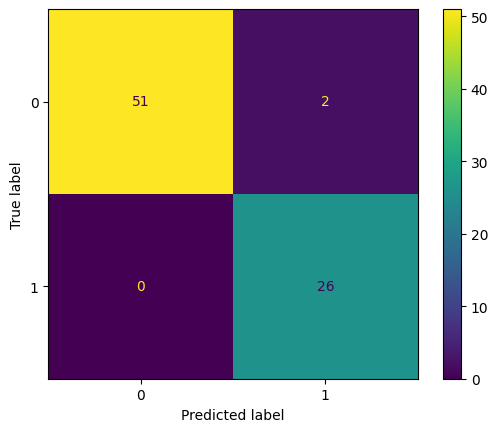

In [ ]:
# Performance Evaluation

print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

# ***PREDICT NEW IMAGE + DISPLAY RESULT***

In [ ]:
hpath = '/content/drive/MyDrive/HORSE.png'
img = imread(hpath)
img = resize(img,(150,150,3)).flatten().reshape(1, -1)
svc.predict(img)

array([0])

In [ ]:
prediction = svc.predict(img)
print("Predicted class:", Categories[prediction[0]])

Predicted class: horse


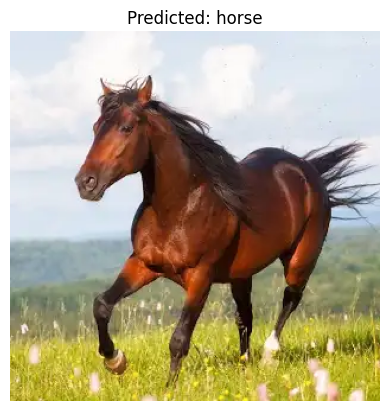

In [ ]:
plt.imshow(imread(hpath))
plt.title(f"Predicted: {Categories[prediction[0]]}")
plt.axis('off')
plt.show()

In [ ]:
path = '/content/drive/MyDrive/HUMAN.png'
img = imread(path)
img = resize(img,(150,150,3)).flatten().reshape(1, -1)
svc.predict(img)

array([1])

In [ ]:
prediction = svc.predict(img)
print("Predicted class:", Categories[prediction[0]])

Predicted class: human


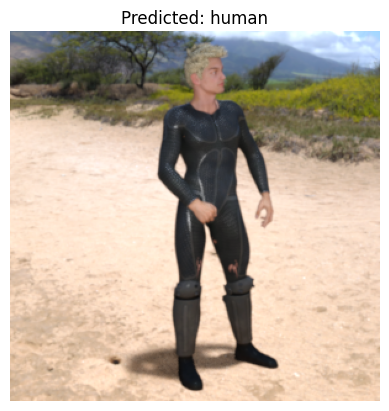

In [ ]:
plt.imshow(imread(path))
plt.title(f"Predicted: {Categories[prediction[0]]}")
plt.axis('off')
plt.show()

more testing and result

In [ ]:
path = '/content/drive/MyDrive/human1.jpeg'
img = imread(path)
img = resize(img,(150,150,3)).flatten().reshape(1, -1)
svc.predict(img)

array([1])

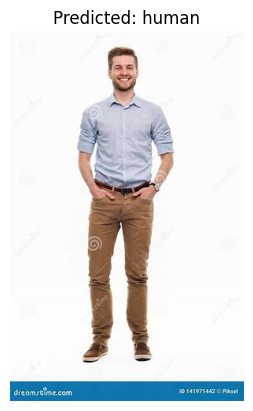

In [ ]:
plt.imshow(imread(path))
plt.title(f"Predicted: {Categories[prediction[0]]}")
plt.axis('off')
plt.show()

In [ ]:
new_path = '/content/drive/MyDrive/horse2.jpeg'
img = imread(new_path)
img = resize(img,(150,150,3)).flatten().reshape(1, -1)
svc.predict(img)

array([0])

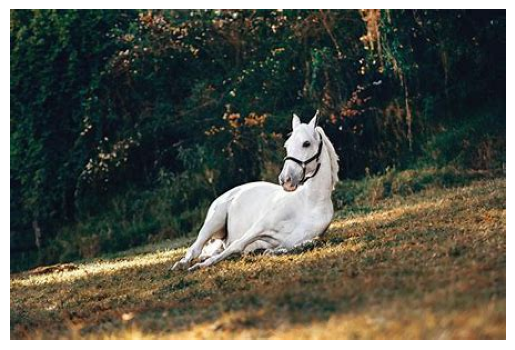

In [ ]:
plt.imshow(imread(new_path))
plt.axis('off')
plt.show()

In [ ]:
path = '/content/drive/MyDrive/horse4.jpeg'
img = imread(path)
img = resize(img,(150,150,3)).flatten().reshape(1, -1)
svc.predict(img)

array([0])

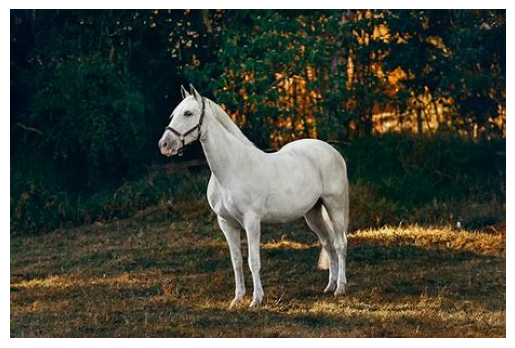

In [ ]:
plt.imshow(imread(path))
plt.axis('off')
plt.show()

In [ ]:
path = '/content/drive/MyDrive/human3.jpeg'
img = imread(path)
img = resize(img,(150,150,3)).flatten().reshape(1, -1)
svc.predict(img)

array([1])

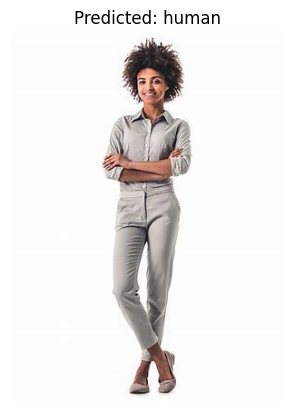

In [ ]:
plt.imshow(imread(path))
plt.title(f"Predicted: {Categories[prediction[0]]}")
plt.axis('off')
plt.show()

In [ ]:
path = '/content/drive/MyDrive/human4.jpeg'
img = imread(path)
img = resize(img,(150,150,3)).flatten().reshape(1, -1)
svc.predict(img)

array([1])

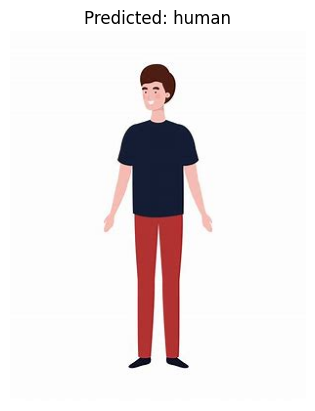

In [ ]:
plt.imshow(imread(path))
plt.title(f"Predicted: {Categories[prediction[0]]}")
plt.axis('off')
plt.show()

_______________________________________